# Vpliv starosti na Covid

V tej analizi poskušava predstaviti kakšne so bile posledice Covida za različne starostne skupine.

Prikazala bova deleže skupin in na njih analizira testirane, pozitivne, cepljene in nato še hospitalizirane, intenzivno nego in umrle.

Mogoče pa obeta anlitično zanimive rezultate.

In [1]:
# libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data

ageCases = pd.read_csv("data/csv/age-cases.csv") # potrjeni primeri
ageDeceased = pd.read_csv("data/csv/age-deceased.csv") # umrli
ageVacination = pd.read_csv("data/csv/vaccination-by_age.csv") # cepljenje
ageHospitals = pd.read_csv("data/csv/episari-nijz-age.csv") # icu

Dataframe bo bil oblike ageGroup(zgori) X stanje(levo.. testi, smrti, itd.), plus normalizerat bo to treba

Torej rabm dva stolpca en za te tipe in en za age groupe, same vrstice bodo pa npt 0-4, testeran. Zdej to bo naredil pol group bu torej jst ceprov ze vem count bom mogu tolkrat appendad to stvar notr da bo pol on lahko group by naredu kar je butasto ampak tko znam da bo lepo.

In [3]:

# zdej pa za vsak type in agegroup posebi for loop narest
# da se da samo za vsak type pa pol nardimo nek split za age group, stem da je treba se moske in zenske sestet
data = pd.DataFrame(columns=['type', 'ageGroup'])

# okuzeni
for name in ageCases:
    tmpName = name.split(".")
    if len(tmpName) == 3 and tmpName[1] != 'male' and tmpName[1] != 'female' and tmpName[1] != 'unknown':
        a = np.array([('Okuženi', tmpName[1])] * int(ageCases[name][-1:].values[0]))
        data = np.concatenate((data, a), axis=0)

# hospitalizacija, not the best
# for name in ageHospitals:
#     tmpName = name.split(".")
#     if len(tmpName) == 5: # and tmpName[1] != 'male' and tmpName[1] != 'female' and tmpName[1] != 'unknown':
#         if tmpName[2] == 'in' and tmpName[3] == 'm':
#             m = tmpName[0] + "." + tmpName[1] + "." + tmpName[2] + ".m." + tmpName[4] 
#             f = tmpName[0] + "." + tmpName[1] + "." + tmpName[2] + ".f." + tmpName[4]
#             a = np.array([('Hospitalizacija', tmpName[4])] * (int(ageHospitals[m][-1:].values[0]) + int(ageHospitals[f][-1:].values[0])))
#             data = np.concatenate((data, a), axis=0)   
#     if len(tmpName) == 6:
#         if tmpName[2] == 'icu' and tmpName[4] == 'm':
#             m = tmpName[0] + "." + tmpName[1] + "." + tmpName[2] + "." + tmpName[3] + ".m." + tmpName[5] 
#             f = tmpName[0] + "." + tmpName[1] + "." + tmpName[2] + "." + tmpName[3] + ".f." + tmpName[5]
#             a = np.array([('Icu', tmpName[5])] * (int(ageHospitals[m][-1:].values[0]) + int(ageHospitals[f][-1:].values[0])))        
#             if len(a) > 0:
#                 data = np.concatenate((data, a), axis=0)     
  

# deceased
for name in ageDeceased:
    tmpName = name.split(".")    
    if len(tmpName) == 3 and tmpName[1] != 'male' and tmpName[1] != 'female':
        a = np.array([('Umrli', tmpName[1])] * int(ageDeceased[name][-1:].values[0]))
        data = np.concatenate((data, a), axis=0)


data = pd.DataFrame(data, columns=['type', 'ageGroup'])
cross_tab = pd.crosstab(index=data['type'], 
                        columns=data['ageGroup'])
cross_tab

ageGroup,0-4,15-24,25-34,35-44,45-54,5-14,55-64,65-74,75-84,85+
type,,,,,,,,,,
Okuženi,22483,146041,198351,259702,224990,154287,162771,95210,50842,26508
Umrli,1,3,10,54,138,1,532,1485,2921,4056


Izkaže se da podatki za hospitalizacijo in intenzivno nego ne obstajajo in te, ki jih imam tukaj niso dobri, zato sem jih izključil.

In [4]:
data_normalized = pd.crosstab(index=data['type'],
                             columns=data['ageGroup'],
                             normalize="index")
data_normalized

ageGroup,0-4,15-24,25-34,35-44,45-54,5-14,55-64,65-74,75-84,85+
type,,,,,,,,,,
Okuženi,0.016764,0.108890,0.147892,0.193636,0.167755,0.115038,0.121364,0.070989,0.037908,0.019765
Umrli,0.000109,0.000326,0.001087,0.005869,0.014998,0.000109,0.057820,0.161396,0.317465,0.440822


##### Plot

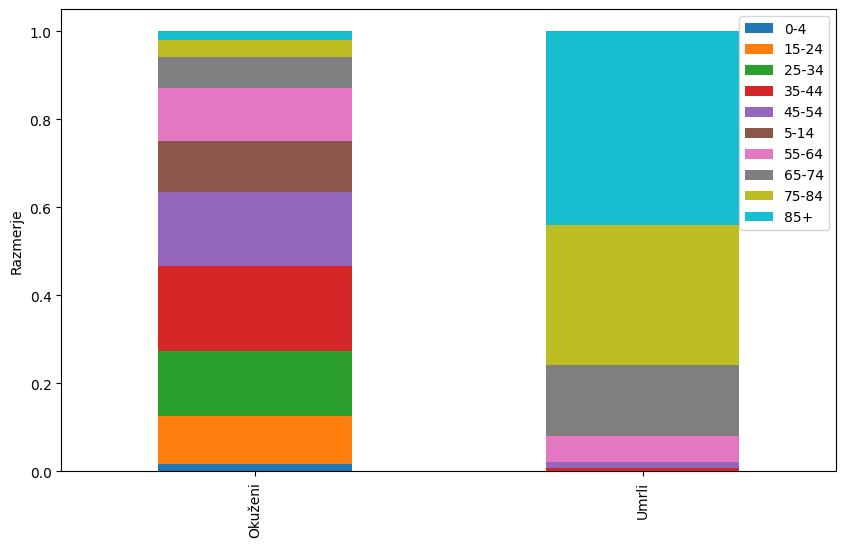

In [5]:
data_normalized.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper right", ncol=1)
plt.xlabel("")
plt.ylabel("Razmerje")
plt.show()

##### Ugotovitev

Za okiženost vidimo da leta en vplivajo preče, ker je distribucija v v seh generacijah podobna, umirajo pa praviloma starejši od 65 let.

Vaccinations all three shots

In [6]:
data = pd.DataFrame(columns=['type', 'ageGroup'])

for name in ageVacination:
    tmpName = name.split(".")
    if len(tmpName) == 5:
        if tmpName[3] == "1st":
            a = np.array([('Prvič', tmpName[2])] * int(ageVacination[name][-1:].values[0]))
            data = np.concatenate((data, a), axis=0)
        if tmpName[3] == "2nd":
            a = np.array([('Drugič', tmpName[2])] * int(ageVacination[name][-1:].values[0]))
            data = np.concatenate((data, a), axis=0)
        if tmpName[3] == "3rd":
            a = np.array([('Tretjič', tmpName[2])] * int(ageVacination[name][-1:].values[0]))
            data = np.concatenate((data, a), axis=0)


data = pd.DataFrame(data, columns=['type', 'ageGroup'])
cross_tab = pd.crosstab(index=data['type'], 
                        columns=data['ageGroup'])
cross_tab

ageGroup,0-11,12-17,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90+
type,,,,,,,,,,,,,,,,,
Drugič,1778,34346,81384,61101,67464,79616,95110,99683,100957,111171,108838,110493,96609,66936,55100,33619,18020
Prvič,2286,36592,85679,64116,70998,83841,99905,104315,104740,114603,111222,112398,98004,67881,56007,34448,18767
Tretjič,9,1019,23912,20189,22355,28586,38687,46061,52874,64935,71629,80893,75217,52402,42300,24786,12113


In [7]:
data_normalized = pd.crosstab(index=data['type'],
                             columns=data['ageGroup'],
                             normalize="index")
data_normalized

ageGroup,0-11,12-17,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90+
type,,,,,,,,,,,,,,,,,
Drugič,0.001455,0.028101,0.066587,0.049992,0.055198,0.065140,0.077817,0.081559,0.082601,0.090958,0.089049,0.090403,0.079044,0.054766,0.045082,0.027506,0.014744
Prvič,0.001806,0.028908,0.067688,0.050652,0.056089,0.066235,0.078926,0.082410,0.082746,0.090538,0.087867,0.088796,0.077424,0.053627,0.044246,0.027214,0.014826
Tretjič,0.000014,0.001549,0.036342,0.030684,0.033976,0.043446,0.058798,0.070005,0.080360,0.098690,0.108864,0.122944,0.114317,0.079642,0.064289,0.037671,0.018410


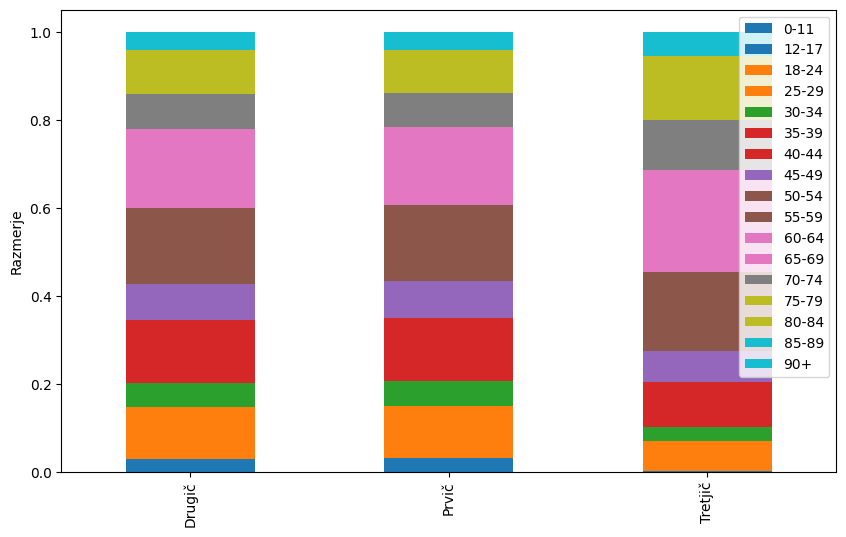

In [8]:
data_normalized.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper right", ncol=1)
plt.xlabel("")
plt.ylabel("Razmerje")
plt.show()

##### Ugotovitve

Torej vidimo da ljudje ki so prejeli cepivo enkrat so ga tudi drugič, za tretjič pa so se za to odločili večinoma ljudje nad 50.